## Forecasting TSI 6 Hours New

This is a notebook created to train the LSTM to forecast TSI, and to make tests with different settings looking for the best one. It is being costumized with the purpose to generate results to the work will be submitted to JSWSC.

In [1]:
from library import *
from matplotlib import dates
from pickle import dump

Using TensorFlow backend.
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ami\anaconda3\envs\rworkflow\lib

In [19]:
np.random.seed(7)

In [20]:
outputPath = './output_files/TSI Predictions/'

# 6 HOURS

In [5]:
P1 = np.asarray(np.loadtxt('./partial_output_files/Tese/P_412days_6hours.csv'))
T1 = np.asarray(np.loadtxt('./partial_output_files/Tese/T_412days_6hours.csv'))
Time1 = np.asarray(np.loadtxt('./partial_output_files/Tese/Time_412days_6hours.csv'))

P2 = np.asarray(np.loadtxt('./partial_output_files/Tese/P_301days_6hours.csv'))
T2 = np.asarray(np.loadtxt('./partial_output_files/Tese/T_301days_6hours.csv'))
Time2 = np.asarray(np.loadtxt('./partial_output_files/Tese/Time_301days_6hours.csv'))

P3 = np.asarray(np.loadtxt('./partial_output_files/Tese/P_105daysA_6hours.csv'))
T3 = np.asarray(np.loadtxt('./partial_output_files/Tese/T_105daysA_6hours.csv'))
Time3 = np.asarray(np.loadtxt('./partial_output_files/Tese/Time_105daysA_6hours.csv'))

P4 = np.asarray(np.loadtxt('./partial_output_files/Tese/P_105daysB_6hours.csv'))
T4 = np.asarray(np.loadtxt('./partial_output_files/Tese/T_105daysB_6hours.csv'))
Time4 = np.asarray(np.loadtxt('./partial_output_files/Tese/Time_105daysB_6hours.csv'))

P5 = np.asarray(np.loadtxt('./partial_output_files/Tese/P_28days_6hours.csv'))
T5 = np.asarray(np.loadtxt('./partial_output_files/Tese/T_28days_6hours.csv'))
Time5 = np.asarray(np.loadtxt('./partial_output_files/Tese/Time_28days_6hours.csv'))

timeTerm = '6 Hours'


# 12 HOURS

In [6]:
# P1 = np.asarray(np.loadtxt('./partial_output_files/412D/P_412dias_12hours.csv'))
# T1 = np.asarray(np.loadtxt('./partial_output_files/412D/T_412dias_12hours.csv'))
# Time1 = np.asarray(np.loadtxt('./partial_output_files/412D/Time_412dias_12hours.csv'))

# P2 = np.asarray(np.loadtxt('./partial_output_files/301D/P_301dias_12hours.csv'))
# T2 = np.asarray(np.loadtxt('./partial_output_files/301D/T_301dias_12hours.csv'))
# Time2 = np.asarray(np.loadtxt('./partial_output_files/301D/Time_301dias_12hours.csv'))

# P3 = np.asarray(np.loadtxt('./partial_output_files/105D1/P_105dias_12hours.csv'))
# T3 = np.asarray(np.loadtxt('./partial_output_files/105D1/T_105dias_12hours.csv'))
# Time3 = np.asarray(np.loadtxt('./partial_output_files/105D1/Time_105dias_12hours.csv'))

# P4 = np.asarray(np.loadtxt('./partial_output_files/105D2/P_105dias_12hours.csv'))
# T4 = np.asarray(np.loadtxt('./partial_output_files/105D2/T_105dias_12hours.csv'))
# Time4 = np.asarray(np.loadtxt('./partial_output_files/105D2/Time_105dias_12hours.csv'))

# P5 = np.asarray(np.loadtxt('./partial_output_files/28D/P_28dias_12hours.csv'))
# T5 = np.asarray(np.loadtxt('./partial_output_files/28D/T_28dias_12hours.csv'))
# Time5 = np.asarray(np.loadtxt('./partial_output_files/28D/Time_28dias_12hours.csv'))

# timeTerm = '12 Hours'

# 18 HOURS

In [7]:
# P1 = np.asarray(np.loadtxt('./partial_output_files/412D/P_412dias_18hours.csv'))
# T1 = np.asarray(np.loadtxt('./partial_output_files/412D/T_412dias_18hours.csv'))
# Time1 = np.asarray(np.loadtxt('./partial_output_files/412D/Time_412dias_18hours.csv'))

# P2 = np.asarray(np.loadtxt('./partial_output_files/301D/P_301dias_18hours.csv'))
# T2 = np.asarray(np.loadtxt('./partial_output_files/301D/T_301dias_18hours.csv'))
# Time2 = np.asarray(np.loadtxt('./partial_output_files/301D/Time_301dias_18hours.csv'))

# P3 = np.asarray(np.loadtxt('./partial_output_files/105D1/P_105dias_18hours.csv'))
# T3 = np.asarray(np.loadtxt('./partial_output_files/105D1/T_105dias_18hours.csv'))
# Time3 = np.asarray(np.loadtxt('./partial_output_files/105D1/Time_105dias_18hours.csv'))

# P4 = np.asarray(np.loadtxt('./partial_output_files/105D2/P_105dias_18hours.csv'))
# T4 = np.asarray(np.loadtxt('./partial_output_files/105D2/T_105dias_18hours.csv'))
# Time4 = np.asarray(np.loadtxt('./partial_output_files/105D2/Time_105dias_18hours.csv'))

# P5 = np.asarray(np.loadtxt('./partial_output_files/28D/P_28dias_18hours.csv'))
# T5 = np.asarray(np.loadtxt('./partial_output_files/28D/T_28dias_18hours.csv'))
# Time5 = np.asarray(np.loadtxt('./partial_output_files/28D/Time_28dias_18hours.csv'))

# timeTerm = '18 Hours'

# 24 HOURS

In [8]:
# P1 = np.asarray(np.loadtxt('./partial_output_files/412D/P_412dias_24hours.csv'))
# T1 = np.asarray(np.loadtxt('./partial_output_files/412D/T_412dias_24hours.csv'))
# Time1 = np.asarray(np.loadtxt('./partial_output_files/412D/Time_412dias_24hours.csv'))

# P2 = np.asarray(np.loadtxt('./partial_output_files/301D/P_301dias_24hours.csv'))
# T2 = np.asarray(np.loadtxt('./partial_output_files/301D/T_301dias_24hours.csv'))
# Time2 = np.asarray(np.loadtxt('./partial_output_files/301D/Time_301dias_24hours.csv'))

# P3 = np.asarray(np.loadtxt('./partial_output_files/105D1/P_105dias_24hours.csv'))
# T3 = np.asarray(np.loadtxt('./partial_output_files/105D1/T_105dias_24hours.csv'))
# Time3 = np.asarray(np.loadtxt('./partial_output_files/105D1/Time_105dias_24hours.csv'))

# P4 = np.asarray(np.loadtxt('./partial_output_files/105D2/P_105dias_24hours.csv'))
# T4 = np.asarray(np.loadtxt('./partial_output_files/105D2/T_105dias_24hours.csv'))
# Time4 = np.asarray(np.loadtxt('./partial_output_files/105D2/Time_105dias_24hours.csv'))

# P5 = np.asarray(np.loadtxt('./partial_output_files/28D/P_28dias_24hours.csv'))
# T5 = np.asarray(np.loadtxt('./partial_output_files/28D/T_28dias_24hours.csv'))
# Time5 = np.asarray(np.loadtxt('./partial_output_files/28D/Time_28dias_24hours.csv'))

# timeTerm = '24 Hours'

# 48 HOURS

In [9]:
# P1 = np.asarray(np.loadtxt('./partial_output_files/412D/P_412dias_48hours.csv'))
# T1 = np.asarray(np.loadtxt('./partial_output_files/412D/T_412dias_48hours.csv'))
# Time1 = np.asarray(np.loadtxt('./partial_output_files/412D/Time_412dias_48hours.csv'))

# P2 = np.asarray(np.loadtxt('./partial_output_files/301D/P_301dias_48hours.csv'))
# T2 = np.asarray(np.loadtxt('./partial_output_files/301D/T_301dias_48hours.csv'))
# Time2 = np.asarray(np.loadtxt('./partial_output_files/301D/Time_301dias_48hours.csv'))

# P3 = np.asarray(np.loadtxt('./partial_output_files/105D1/P_105dias_48hours.csv'))
# T3 = np.asarray(np.loadtxt('./partial_output_files/105D1/T_105dias_48hours.csv'))
# Time3 = np.asarray(np.loadtxt('./partial_output_files/105D1/Time_105dias_48hours.csv'))

# P4 = np.asarray(np.loadtxt('./partial_output_files/105D2/P_105dias_48hours.csv'))
# T4 = np.asarray(np.loadtxt('./partial_output_files/105D2/T_105dias_48hours.csv'))
# Time4 = np.asarray(np.loadtxt('./partial_output_files/105D2/Time_105dias_48hours.csv'))

# P5 = np.asarray(np.loadtxt('./partial_output_files/28D/P_28dias_48hours.csv'))
# T5 = np.asarray(np.loadtxt('./partial_output_files/28D/T_28dias_48hours.csv'))
# Time5 = np.asarray(np.loadtxt('./partial_output_files/28D/Time_28dias_48hours.csv'))

# timeTerm = '48 Hours'

# 72 HOURS

In [10]:
# P1 = np.asarray(np.loadtxt('./partial_output_files/412D/P_412dias_72hours.csv'))
# T1 = np.asarray(np.loadtxt('./partial_output_files/412D/T_412dias_72hours.csv'))
# Time1 = np.asarray(np.loadtxt('./partial_output_files/412D/Time_412dias_72hours.csv'))

# P2 = np.asarray(np.loadtxt('./partial_output_files/301D/P_301dias_72hours.csv'))
# T2 = np.asarray(np.loadtxt('./partial_output_files/301D/T_301dias_72hours.csv'))
# Time2 = np.asarray(np.loadtxt('./partial_output_files/301D/Time_301dias_72hours.csv'))

# P3 = np.asarray(np.loadtxt('./partial_output_files/105D1/P_105dias_72hours.csv'))
# T3 = np.asarray(np.loadtxt('./partial_output_files/105D1/T_105dias_72hours.csv'))
# Time3 = np.asarray(np.loadtxt('./partial_output_files/105D1/Time_105dias_72hours.csv'))

# P4 = np.asarray(np.loadtxt('./partial_output_files/105D2/P_105dias_72hours.csv'))
# T4 = np.asarray(np.loadtxt('./partial_output_files/105D2/T_105dias_72hours.csv'))
# Time4 = np.asarray(np.loadtxt('./partial_output_files/105D2/Time_105dias_72hours.csv'))

# P5 = np.asarray(np.loadtxt('./partial_output_files/28D/P_28dias_72hours.csv'))
# T5 = np.asarray(np.loadtxt('./partial_output_files/28D/T_28dias_72hours.csv'))
# Time5 = np.asarray(np.loadtxt('./partial_output_files/28D/Time_28dias_72hours.csv'))

# timeTerm = '72 Hours'

In [11]:
# print(np.count_nonzero(np.isnan(P1)))
# print(np.count_nonzero(np.isnan(P2)))
# print(np.count_nonzero(np.isnan(P3)))
# print(np.count_nonzero(np.isnan(P4)))
# print(np.count_nonzero(np.isnan(P5)))
# print('')
# print(np.count_nonzero(np.isnan(T1)))
# print(np.count_nonzero(np.isnan(T2)))
# print(np.count_nonzero(np.isnan(T3)))
# print(np.count_nonzero(np.isnan(T4)))
# print(np.count_nonzero(np.isnan(T5)))

In [12]:
P1 = np.transpose(P1)
T1 = T1.reshape(-1,1)

P2 = np.transpose(P2)
T2 = T2.reshape(-1,1)

P3 = np.transpose(P3)
T3 = T3.reshape(-1,1)

P4 = np.transpose(P4)
T4 = T4.reshape(-1,1)

P5 = np.transpose(P5)
T5 = T5.reshape(-1,1)

In [13]:
P1.shape

(1651, 40)

In [14]:
S4 = np.asarray(np.loadtxt('./partial_output_files/SatireTSI_105dias.csv'))
E4 = np.asarray(np.loadtxt('./partial_output_files/EmpireTSI_105dias.csv'))

S5 = np.asarray(np.loadtxt('./partial_output_files/SatireTSI_28dias.csv'))
E5 = np.asarray(np.loadtxt('./partial_output_files/EmpireTSI_28dias.csv'))

PT = P4
TT = T4
TimeT = Time4

period = '2011/05/18 to 2011/08/31'

E = E4
S = S4

testSet='set4'

# PT = P5
# TT = T5
# TimeT = Time5

# period = '2012/11/20 to 2012/12/18'

# E = E5
# S = S5

# testSet='set5'



In [15]:
np.concatenate([P1,P2,P3]).shape

(3281, 40)

Standarizing the data:

In [21]:
scalerIn = MinMaxScaler(feature_range=(0, 1))
scalerOut = MinMaxScaler(feature_range=(0, 1))

scalerI = scalerIn.fit(np.concatenate([P1,P2,P3]))

#Salvar
with open('./Unique/scalerI.pkl', 'wb') as handle:
    dump(scalerI, handle)

# # Save it
# joblib.dump(scalerI, "my_scaler.save") 

scalerO = scalerOut.fit(np.concatenate([T1,T2,T3]))
#Salvar
with open('./Unique/scalerO.pkl', 'wb') as handle:
    dump(scalerO, handle)
    
x1 = scalerIn.transform(P1)
x2 = scalerIn.transform(P2)
x3 = scalerIn.transform(P3)
x4 = scalerIn.transform(P4)
x5 = scalerIn.transform(P5)

xt = scalerIn.transform(PT)

y1 = scalerOut.transform(T1)
y2 = scalerOut.transform(T2)
y3 = scalerOut.transform(T3)
y4 = scalerOut.transform(T4)
y5 = scalerOut.transform(T5)

yt = scalerOut.transform(TT)

Defining a mask value (an outlier value) to replace the *nan* values of the output vector. (The nets can't deal with *nan* values)

In [22]:
units = 9
epochs = 50
shuffle = True
test_size = 0.2
#loss='mse'
loss = 'mean_squared_error'
optimizer = 'adam'
#optimizer = 'rmsprop'
# dropout = 0.2
lookback = 1
batchRate = 1/100

In [23]:
# mse = []
testsqtd = 1
error =[]
rnn = []
pred = []
# net = 'gru'
net = 'lstm'
expName = outputPath + timeTerm + "_"+testSet+net
    
p = np.concatenate([x1,x2,x3])
t = np.concatenate([y1,y2,y3])

sxTest = xt
syTest = yt

sxTrain, sxVal, syTrain, syVal= train_test_split(p, t, test_size=test_size, shuffle=shuffle)

sxTrain = sxTrain.reshape((sxTrain.shape[0], lookback, sxTrain.shape[1])) 
sxVal = sxVal.reshape((sxVal.shape[0], lookback, sxVal.shape[1]))
sxTest = sxTest.reshape((sxTest.shape[0], lookback, sxTest.shape[1])) 

batch_size = int(sxTrain.shape[0] * batchRate)
    
for j in range(testsqtd):

#     print("Teste #"+str(j+1)+" para batch rate of "+str(batchRate)+"%: "+str(batch_size))

    model = Sequential()
#     model.add(SimpleRNN(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2]), activation='relu'))#, return_sequences=True)) # , return_sequences=True
    model.add(LSTM(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2]), activation='tanh'))#, return_sequences=True)) # , return_sequences=True
#     model.add(GRU(units=units, input_shape=(sxTrain.shape[1],sxTrain.shape[2]), activation='tanh'))#, return_sequences=True)) # , return_sequences=True
    model.add(Dense(1))
    model.compile(loss=loss, optimizer=optimizer)

    # checkpoint
    filepath = './Unique/weights.hdf5'
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')
    callbacks_list = [checkpoint]

    # Fit the model
    f = model.fit(sxTrain, syTrain, epochs=epochs, batch_size=batch_size, validation_data=(sxVal,syVal), callbacks=callbacks_list)

    #Load the best weights
    model.load_weights(filepath)

    #Compile model (required to make predictions)
    model.compile(loss=loss, optimizer=optimizer) #, metrics=['accuracy'])

    syTrainP = model.predict(sxTrain)
    syValP = model.predict(sxVal)
    syTestP = model.predict(sxTest)

    yTestP = scalerOut.inverse_transform(syTestP)
    yTest = scalerOut.inverse_transform(syTest)

    rnnR2 = r2_score(yTest, yTestP)
    rnnR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(yTestP))
    rnnMSE = mean_squared_error(yTest, yTestP)
    rnnMAPE = mean_absolute_percentage_error(yTest, yTestP)

    error.append([epochs, np.min(f.history['val_loss'])])
    rnn.append([epochs, rnnR2, rnnR, rnnMSE, rnnMAPE])
    pred.append(yTestP)
    pred = np.squeeze(np.asarray(pred))
    data = np.c_[Time4,pred]
    print('net R2: {:2.2%} Corr: {:2.2%} MSE: {:2.2}'.format(rnnR2, rnnR, rnnMSE, rnnMAPE))
np.savetxt(expName+'.csv',rnn)
np.savetxt(expName+'_predicted.csv',data)


Train on 2624 samples, validate on 657 samples
Epoch 1/50
2624/2624 [==============================] - 1s 229us/step - loss: 0.1536 - val_loss: 0.0270
Epoch 2/50
2624/2624 [==============================] - 0s 80us/step - loss: 0.0261 - val_loss: 0.0203
Epoch 3/50
2624/2624 [==============================] - 0s 74us/step - loss: 0.0196 - val_loss: 0.0151
Epoch 4/50
2624/2624 [==============================] - 0s 82us/step - loss: 0.0148 - val_loss: 0.0112
Epoch 5/50
2624/2624 [==============================] - 0s 79us/step - loss: 0.0112 - val_loss: 0.0085
Epoch 6/50
2624/2624 [==============================] - 0s 78us/step - loss: 0.0088 - val_loss: 0.0066
Epoch 7/50
2624/2624 [==============================] - 0s 89us/step - loss: 0.0071 - val_loss: 0.0054
Epoch 8/50
2624/2624 [==============================] - 0s 76us/step - loss: 0.0059 - val_loss: 0.0046
Epoch 9/50
2624/2624 [==============================] - 0s 79us/step - loss: 0.0050 - val_loss: 0.0039
Epoch 10/50
2624/2624 [=

In [24]:
times = []
partial = [0.,0.25,0.5,0.75]
horas = ['00:00','06:00','12:00','18:00']
for i in Time4:
    d = date.fromordinal(int(i))
    dif = i-int(i)
    j = np.where(partial==dif)
    hm = horas[np.squeeze(j)]
    print(str(d)+' '+hm)


2011-05-18 00:00
2011-05-18 06:00
2011-05-18 12:00
2011-05-18 18:00
2011-05-19 00:00
2011-05-19 06:00
2011-05-19 12:00
2011-05-19 18:00
2011-05-20 00:00
2011-05-20 06:00
2011-05-20 12:00
2011-05-20 18:00
2011-05-21 00:00
2011-05-21 06:00
2011-05-21 12:00
2011-05-21 18:00
2011-05-22 00:00
2011-05-22 06:00
2011-05-22 12:00
2011-05-22 18:00
2011-05-23 00:00
2011-05-23 06:00
2011-05-23 12:00
2011-05-23 18:00
2011-05-24 00:00
2011-05-24 06:00
2011-05-24 12:00
2011-05-24 18:00
2011-05-25 00:00
2011-05-25 06:00
2011-05-25 12:00
2011-05-25 18:00
2011-05-26 00:00
2011-05-26 06:00
2011-05-26 12:00
2011-05-26 18:00
2011-05-27 00:00
2011-05-27 06:00
2011-05-27 12:00
2011-05-27 18:00
2011-05-28 00:00
2011-05-28 06:00
2011-05-28 12:00
2011-05-28 18:00
2011-05-29 00:00
2011-05-29 06:00
2011-05-29 12:00
2011-05-29 18:00
2011-05-30 00:00
2011-05-30 06:00
2011-05-30 12:00
2011-05-30 18:00
2011-05-31 00:00
2011-05-31 06:00
2011-05-31 12:00
2011-05-31 18:00
2011-06-01 00:00
2011-06-01 06:00
2011-06-01 12:

In [25]:
np.savetxt(expName+'_time.csv',data)

In [26]:
times

[]

#### Training and Validation Losses Histories

In [27]:
# make predictions
syTrainP = model.predict(sxTrain)
syValP = model.predict(sxVal)   

syTrain = syTrain

yTrain = scalerOut.inverse_transform(syTrain)
yTrainP = scalerOut.inverse_transform(syTrainP)

yVal = scalerOut.inverse_transform(syVal)
yValP = scalerOut.inverse_transform(syValP)

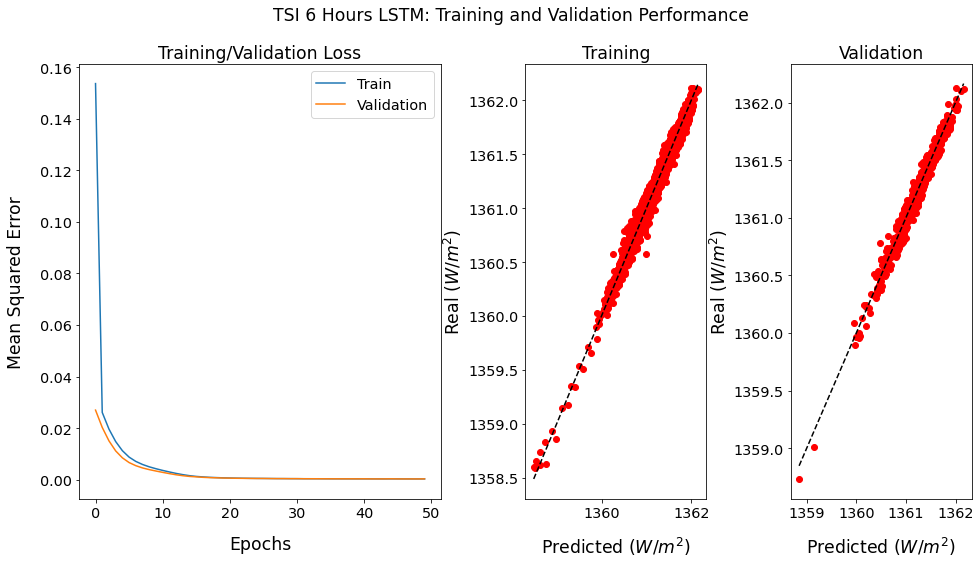

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8), gridspec_kw={'width_ratios': [2, 1, 1]})

plt.subplots_adjust(wspace=0.35)#, hspace=None)
plt.suptitle("TSI "+timeTerm+" "+net.upper()+": Training and Validation Performance", fontsize='xx-large')

ax1.plot(f.history['loss'], label='Train')
ax1.plot(f.history['val_loss'], label='Validation')
ax1.set_title('Training/Validation Loss', fontsize='xx-large')
ax1.set_xlabel('Epochs', labelpad=15, fontsize='xx-large')
ax1.set_ylabel('Mean Squared Error', labelpad=15, fontsize='xx-large')
ax1.legend(fontsize='x-large')
ax1.tick_params(axis='x', labelsize='x-large' ) 
ax1.tick_params(axis='y', labelsize='x-large' ) 

ax2.scatter(yTrain,yTrainP, color='red')
ax2.set_xlabel('Predicted ($W/m^2$)', labelpad=15, fontsize='xx-large')
ax2.set_ylabel('Real ($W/m^2$)', fontsize='xx-large')
ax2.set_title('Training', fontsize='xx-large')
#plt.plot([-2,2],[-2,2])
ax2.plot([yTrain.min(), yTrain.max()], [yTrain.min(), yTrain.max()], color='black', 
         linestyle='--', label='optimal')
ax2.tick_params(axis='x', labelsize='x-large' ) 
ax2.tick_params(axis='y', labelsize='x-large' ) 

ax3.scatter(yVal,yValP, color='red')
ax3.set_xlabel('Predicted ($W/m^2$)', labelpad=15, fontsize='xx-large')
ax3.set_ylabel('Real ($W/m^2$)', fontsize='xx-large')
# ax3.set_yticks([])
ax3.set_title('Validation', fontsize='xx-large')
#plt.plot([-2,2],[-2,2])
ax3.plot([yVal.min(), yVal.max()], [yVal.min(), yVal.max()], color='black', 
         linestyle='--', label='optimal')
ax3.tick_params(axis='x', labelsize='x-large') 
ax3.tick_params(axis='y', labelsize='x-large' ) 

#fig.savefig('./Figures/LSTM Training x Validation 6Hours.png', dpi=600, format='png')
fig.savefig('./Figures/TSI Predictions/'+net.upper()+'_Training x Validation_'+timeTerm+'.png', dpi=200, format='png')

### Predicting Test Set 4

In [29]:
PT = P4
TT = T4
TimeT = Time4
testSet = 'Set4'

xt = scalerIn.transform(PT)
yt = scalerOut.transform(TT)

sxTest = xt
syTest = yt

sxTest = sxTest.reshape((sxTest.shape[0], lookback, sxTest.shape[1])) 
syTestP = model.predict(sxTest)

yTestP = scalerOut.inverse_transform(syTestP)
yTest = scalerOut.inverse_transform(syTest)

rnnR2 = r2_score(yTest, yTestP)
rnnR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(yTestP))
rnnMSE = mean_squared_error(yTest, yTestP)
rnnMAPE = mean_absolute_percentage_error(yTest, yTestP)

r = "{:.1%}".format(rnnR)
r2 = "{:.1%}".format(rnnR2)
mse = "{:.2}".format(rnnMSE)
mape = "{:.4%}".format(rnnMAPE)

textstr = '\n'.join(('R = '+r,
                     r'$R^2$ = '+r2,
                     'MSE = '+mse,
                     'MAPE = '+mape))

In [30]:
dataT = []
hours = [0,0.25,0.5,0.75]
h = 0
datesT = np.zeros(TimeT.shape[0])
for i in TimeT:
    index = np.mod(h,4)
    dataT = str(date.fromordinal(int(i)))
    datesT[h] = dates.date2num(dataT)+hours[index]
    h += 1
    
# datesT = dates.date2num(dataT)

hfmt = dates.DateFormatter('%m/%d')

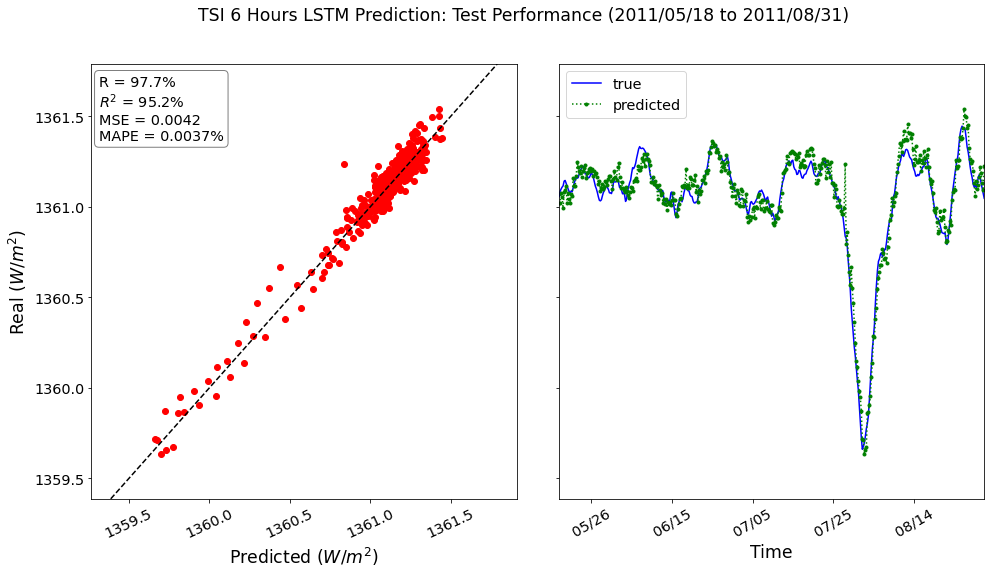

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)

plt.subplots_adjust(wspace=0.1)#, hspace=None)

mi = np.min([yTestP.min(),yTest.min()])-0.25
ma = np.max([yTestP.max(),yTest.max()])+0.25

yAxis = [mi,ma]

plt.suptitle("TSI "+timeTerm+" "+net.upper()+" Prediction: Test Performance ("+period+")", fontsize='xx-large')

ax1.scatter(yTest, yTestP, color='red')
ax1.set_xlabel('Predicted ($W/m^2$)', labelpad=5, fontsize='xx-large')
ax1.set_ylabel('Real ($W/m^2$)', labelpad=5, fontsize='xx-large')
# ax1.set_title('Test')
ax1.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')
ax1.tick_params(axis='x', rotation=25, labelsize='x-large')
ax1.tick_params(axis='y', labelsize='x-large')

props = dict(boxstyle='round', facecolor='None', alpha=0.5)
# place a text box in upper left in axes coords
ax1.text(0.0175, 0.975, textstr, transform=ax1.transAxes, fontsize='x-large',
        verticalalignment='top', bbox=props)


ax2.plot(datesT,yTest,'b-',label='true')
ax2.plot(datesT,yTestP,'g.:',label='predicted')
ax2.set_ylim(yAxis)
ax2.set_xlim([datesT[0],datesT[-1]])
ax2.set_xlabel('Time', labelpad=5, fontsize='xx-large')
ax2.tick_params(axis='x', rotation=30, labelsize='x-large')
ax2.legend(fontsize='x-large')

fig.savefig('./Figures/TSI Predictions/'+net.upper()+'_Test'+testSet+'_'+timeTerm+'.png', dpi=200, format='png', pad_inches=0.1)

### Predicting Test Set 5

In [22]:
PT = P5
TT = T5
TimeT = Time5
testSet = 'Set5'

xt = scalerIn.transform(PT)
yt = scalerOut.transform(TT)

sxTest = xt
syTest = yt

sxTest = sxTest.reshape((sxTest.shape[0], lookback, sxTest.shape[1])) 
syTestP = model.predict(sxTest)

yTestP = scalerOut.inverse_transform(syTestP)
yTest = scalerOut.inverse_transform(syTest)

rnnR2 = r2_score(yTest, yTestP)
rnnR, a = stats.pearsonr(np.squeeze(yTest), np.squeeze(yTestP))
rnnMSE = mean_squared_error(yTest, yTestP)
rnnMAPE = mean_absolute_percentage_error(yTest, yTestP)

r = "{:.1%}".format(rnnR)
r2 = "{:.1%}".format(rnnR2)
mse = "{:.2}".format(rnnMSE)
mape = "{:.4%}".format(rnnMAPE)

textstr = '\n'.join(('R = '+r,
                     r'$R^2$ = '+r2,
                     'MSE = '+mse,
                     'MAPE = '+mape))

In [23]:
dataT = []
hours = [0,0.25,0.5,0.75]
h = 0
datesT = np.zeros(TimeT.shape[0])
for i in TimeT:
    index = np.mod(h,4)
    dataT = str(date.fromordinal(int(i)))
    datesT[h] = dates.date2num(dataT)+hours[index]
    h += 1
    
# datesT = dates.date2num(dataT)

hfmt = dates.DateFormatter('%m/%d')

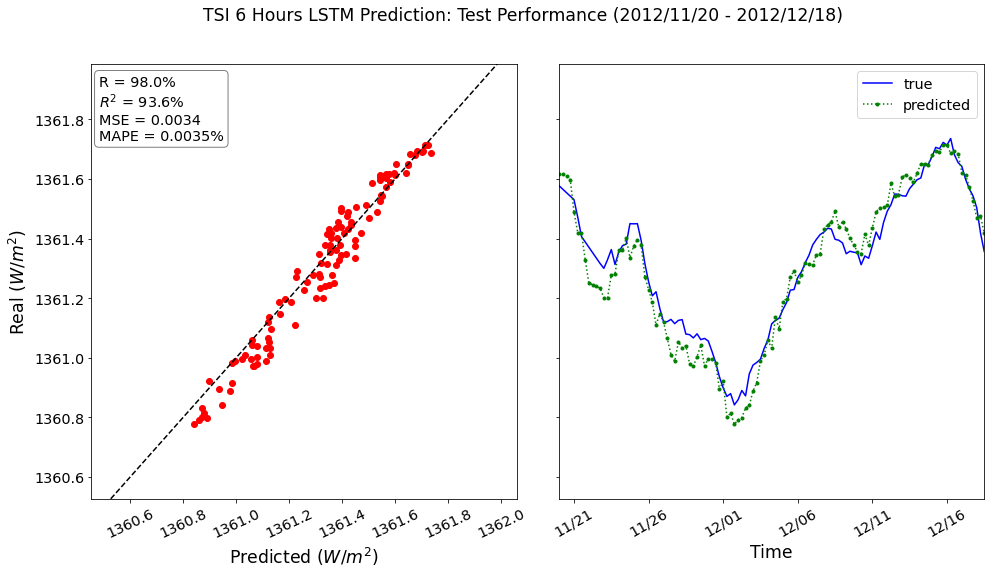

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)

plt.subplots_adjust(wspace=0.1)#, hspace=None)

mi = np.min([yTestP.min(),yTest.min()])-0.25
ma = np.max([yTestP.max(),yTest.max()])+0.25

yAxis = [mi,ma]

plt.suptitle("TSI "+timeTerm+" "+net.upper()+" Prediction: Test Performance (2012/11/20 - 2012/12/18)", fontsize='xx-large')

ax1.scatter(yTest, yTestP, color='red')
ax1.set_xlabel('Predicted ($W/m^2$)', labelpad=5, fontsize='xx-large')
ax1.set_ylabel('Real ($W/m^2$)', labelpad=5, fontsize='xx-large')
# ax1.set_title('Test')
ax1.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')
ax1.tick_params(axis='x', rotation=25, labelsize='x-large')
ax1.tick_params(axis='y', labelsize='x-large')

props = dict(boxstyle='round', facecolor='None', alpha=0.5)
# place a text box in upper left in axes coords
ax1.text(0.0175, 0.975, textstr, transform=ax1.transAxes, fontsize='x-large',
        verticalalignment='top', bbox=props)

ax2.plot(datesT,yTest,'b-',label='true')
ax2.plot(datesT,yTestP,'g.:',label='predicted')
ax2.set_ylim(yAxis)
ax2.set_xlim([datesT[0],datesT[-1]])
ax2.set_xlabel('Time', labelpad=5, fontsize='xx-large')
ax2.tick_params(axis='x', rotation=30, labelsize='x-large')
ax2.legend(fontsize='x-large')

fig.savefig('./Figures/TSI Predictions/'+net.upper()+'_Test'+testSet+'_'+timeTerm+'.png', dpi=200, format='png', pad_inches=0.1)

# Comparison vs Physical Models

# Test Set 5

(28,)
(28,)


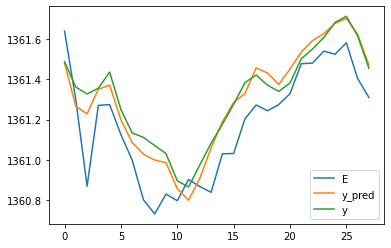

In [25]:
# print(len(np.arange(0,len(yTestP),4)))

#plt.plot(yTestP)
plt.plot(E, label="E")

# yTestPNovo = yTestP[np.arange(3,len(yTestP),4)]

yTestPNovo = []
yTestPNovo.append(np.mean(yTestP[0:3]))
yTestNovo = []
yTestNovo.append(np.mean(yTest[0:3]))
for i in range(3,len(yTestP),4):
    yTestPNovo.append(np.mean(yTestP[i:i+4]))
    yTestNovo.append(np.mean(yTest[i:i+4]))

yTestNovo = np.asarray(yTestNovo)
yTestPNovo = np.asarray(yTestPNovo)

plt.plot(yTestPNovo[1:],label="y_pred")
plt.plot(yTestNovo[1:],label="y")

TimeNovo = TimeT[np.arange(4,len(yTestP),4)]
# print(Time4)
print(TimeNovo.shape)

plt.legend()
print(E.shape)
# print(S4.shape)
# print(yTestPNovo[1:].shape)

# print(yTestPNovo[:-1].shape)
# for i in Time4:
#     print(date.fromordinal(int(i)))


In [52]:
S1 = S + 0.275

In [53]:
from matplotlib import dates

dataT = []

for i in TimeNovo:
    dataT.append(str(date.fromordinal(int(i))))

datesT = dates.date2num(dataT)

# print(Time4)

hfmt = dates.DateFormatter('%m/%d')


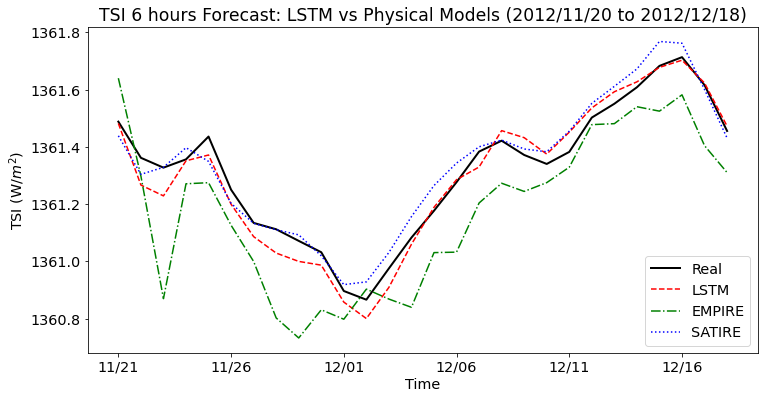

In [54]:
fig = plt.figure(figsize=(12, 6))

ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)
plt.title('TSI 6 hours Forecast: LSTM vs Physical Models ('+period+')', fontsize='xx-large')
plt.plot(datesT,yTestNovo[1:], linewidth = 2, color='black', linestyle='-', label = 'Real')
plt.plot(datesT,yTestPNovo[1:], color='red', linestyle='--', label = 'LSTM')
plt.plot(datesT,E, color='green', linestyle='-.', label = 'EMPIRE')
plt.plot(datesT,S1, color='blue', linestyle=':', label = 'SATIRE')
#plt.plot(dates3,lAModel[:,2])
plt.tick_params(labelsize='x-large')
plt.xlabel('Time',fontsize='x-large')
plt.ylabel('TSI (W/$m^2$)',fontsize='x-large')
plt.legend(fontsize='x-large')
fig.savefig('./Figures/TSI Predictions/'+net.upper()+'_Test'+testSet+'_PhysicalModels.png', dpi=200, format='png', pad_inches=0.1)

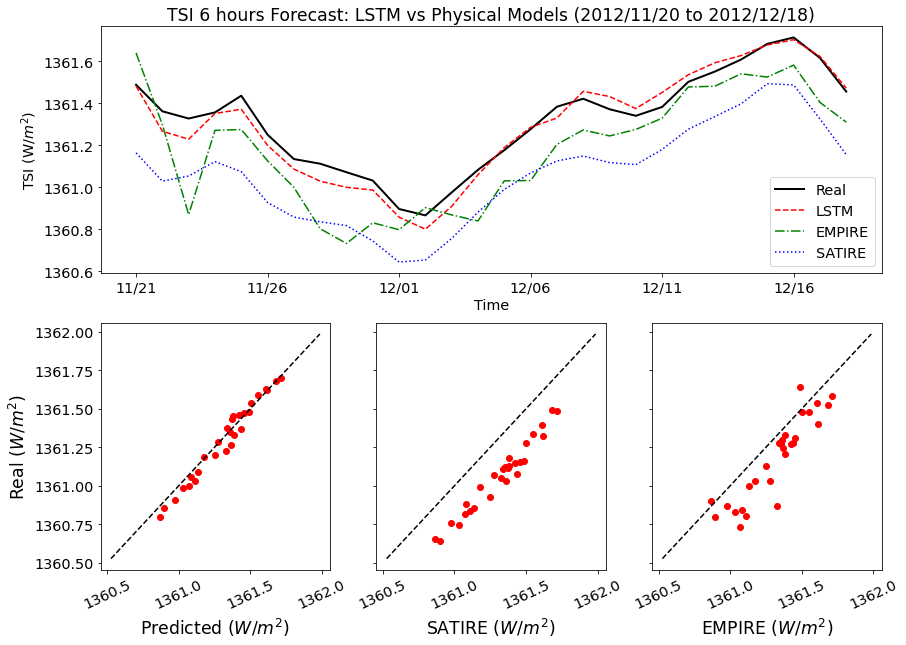

In [57]:
fig = plt.figure(figsize=(14, 10))

ax1 = plt.subplot(211)
ax = plt.gca()
ax.xaxis.set_major_formatter(hfmt)
ax1.set_title('TSI 6 hours Forecast: LSTM vs Physical Models ('+period+')', fontsize='xx-large')
ax1.plot(datesT,yTestNovo[1:], linewidth = 2, color='black', linestyle='-', label = 'Real')
ax1.plot(datesT,yTestPNovo[1:], color='red', linestyle='--', label = 'LSTM')
ax1.plot(datesT,E, color='green', linestyle='-.', label = 'EMPIRE')
ax1.plot(datesT,S, color='blue', linestyle=':', label = 'SATIRE')
#plt.plot(dates3,lAModel[:,2])
ax1.tick_params(labelsize='x-large')
ax1.set_xlabel('Time',fontsize='x-large')
ax1.set_ylabel('TSI (W/$m^2$)',fontsize='x-large')
ax1.legend(fontsize='x-large')


ax2 = plt.subplot(234)
ax2.scatter(yTestNovo[1:], yTestPNovo[1:], color='red')
ax2.set_xlabel('Predicted ($W/m^2$)', labelpad=5, fontsize='xx-large')
ax2.set_ylabel('Real ($W/m^2$)', labelpad=5, fontsize='xx-large')
# ax1.set_title('Test')
ax2.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')
ax2.tick_params(axis='x', rotation=25, labelsize='x-large')
ax2.tick_params(axis='y', labelsize='x-large')

ax3 = plt.subplot(235)
ax3.scatter(yTestNovo[1:], S, color='red')
ax3.set_xlabel('SATIRE ($W/m^2$)', labelpad=5, fontsize='xx-large')
# ax3.set_ylabel('Real ($W/m^2$)', labelpad=5, fontsize='xx-large')
# ax1.set_title('Test')
ax3.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')
ax3.tick_params(axis='x', rotation=25, labelsize='x-large')
ax3.tick_params(axis='y', labelsize='x-large')
ax3.set_yticklabels([])

ax4 = plt.subplot(236)
ax4.scatter(yTestNovo[1:], E, color='red')
ax4.set_xlabel('EMPIRE ($W/m^2$)', labelpad=5, fontsize='xx-large')
# ax4.set_ylabel('Real ($W/m^2$)', labelpad=5, fontsize='xx-large')
# ax1.set_title('Test')
ax4.plot(yAxis,yAxis, color='black', 
         linestyle='--', label='optimal')
ax4.tick_params(axis='x', rotation=25, labelsize='x-large')
ax4.tick_params(axis='y', labelsize='x-large')
ax4.set_yticklabels([])

fig.savefig('./Figures/TSI Predictions/'+net.upper()+'_Test'+testSet+'_PhysicalModels.png', dpi=200, format='png', pad_inches=0.1)
